# Parkinson's Disease Detection


## Table of Contents
1. [Data Loading and Exploration](#data-loading)
2. [Data Visualization](#visualization)
3. [Data Preprocessing](#preprocessing)
4. [Model Architecture](#model)
5. [Model Training](#training)
6. [Model Evaluation](#evaluation)
7. [Results and Insights](#results)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
tf.random.set_seed(42)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.19.0
Keras version: 3.10.0


## 1. Data Loading and Exploration <a id="data-loading"></a>

In [3]:
df = pd.read_csv('parkinsons_synthetic_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()

print(f"\nFirst few rows:")
df.head()

Dataset shape: (2000, 23)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accel_x_mean      2000 non-null   float64
 1   accel_y_mean      2000 non-null   float64
 2   accel_z_mean      2000 non-null   float64
 3   accel_x_std       2000 non-null   float64
 4   accel_y_std       2000 non-null   float64
 5   accel_z_std       2000 non-null   float64
 6   gyro_x_mean       2000 non-null   float64
 7   gyro_y_mean       2000 non-null   float64
 8   gyro_z_mean       2000 non-null   float64
 9   gyro_x_std        2000 non-null   float64
 10  gyro_y_std        2000 non-null   float64
 11  gyro_z_std        2000 non-null   float64
 12  accel_x_fft_peak  2000 non-null   float64
 13  accel_y_fft_peak  2000 non-null   float64
 14  accel_z_fft_peak  2000 non-null   float64
 15  gyro_x_fft_peak   2000 non-null   float64
 16  g

,accel_x_mean,accel_y_mean,accel_z_mean,accel_x_std,accel_y_std,accel_z_std,gyro_x_mean,gyro_y_mean,gyro_z_mean,gyro_x_std,...,accel_y_fft_peak,accel_z_fft_peak,gyro_x_fft_peak,gyro_y_fft_peak,gyro_z_fft_peak,cross_corr_x,cross_corr_y,cross_corr_z,label,has_parkinson
0,-0.061029,-0.057799,-0.041774,0.218548,0.616021,0.395053,0.019425,0.007385,0.017333,0.421883,...,11.522007,12.371335,12.418004,8.756852,9.837176,0.780600,0.808512,0.776413,0,No
1,0.148467,-0.137491,-0.074901,0.984387,1.575123,1.267588,0.019878,-0.009484,-0.068859,1.151160,...,7.048014,6.169312,7.190944,4.878652,6.289193,0.375925,0.446629,0.701584,1,Yes
2,0.028246,-0.098587,0.100551,0.394231,0.527798,0.437175,0.043125,-0.029502,0.045614,0.336052,...,10.320006,11.012100,9.453279,10.922157,11.435692,0.774331,0.965147,0.848217,0,No
3,0.071342,0.046233,0.084636,0.401892,0.260405,0.490273,0.011063,0.011579,0.007704,0.217637,...,12.628859,8.177780,8.911790,10.366993,12.001590,0.775248,0.698464,0.801254,0,No
4,0.004662,0.091466,0.022313,0.465600,0.283474,0.451064,0.025885,0.034627,-0.008471,0.270186,...,11.239327,9.339527,8.221458,11.587629,8.613877,0.932797,0.886975,0.820957,0,No


In [4]:
# Basic statistics
print("Class distribution:")
print(df['has_parkinson'].value_counts())
print(f"\nClass distribution (%):'")
print(df['has_parkinson'].value_counts(normalize=True) * 100)

print(f"\nBasic statistics:")
df.describe()

Class distribution:
has_parkinson
No     1000
Yes    1000
Name: count, dtype: int64

Class distribution (%):'
has_parkinson
No     50.0
Yes    50.0
Name: proportion, dtype: float64

Basic statistics:


,accel_x_mean,accel_y_mean,accel_z_mean,accel_x_std,accel_y_std,accel_z_std,gyro_x_mean,gyro_y_mean,gyro_z_mean,gyro_x_std,...,accel_x_fft_peak,accel_y_fft_peak,accel_z_fft_peak,gyro_x_fft_peak,gyro_y_fft_peak,gyro_z_fft_peak,cross_corr_x,cross_corr_y,cross_corr_z,label
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.000331,0.000943,0.000839,0.772749,0.894960,0.751895,0.000240,-0.000368,0.002069,0.555430,...,7.780785,7.737919,7.727089,7.762457,7.759728,7.719178,0.638228,0.586022,0.660953,0.500000
std,0.092904,0.129863,0.091947,0.413199,0.496924,0.452066,0.045251,0.045552,0.045184,0.347051,...,2.515281,2.519037,2.503188,2.498690,2.526151,2.468963,0.206106,0.254189,0.195024,0.500125
min,-0.218822,-0.324713,-0.215160,0.186716,0.185569,0.181969,-0.108901,-0.108048,-0.108089,0.092769,...,3.687746,3.664500,3.638947,3.654667,3.680255,3.691931,0.277964,0.185194,0.280990,0.000000
25%,-0.066232,-0.073753,-0.066248,0.389808,0.439416,0.347468,-0.032017,-0.032190,-0.029700,0.240597,...,5.472095,5.479845,5.455465,5.523314,5.495816,5.536046,0.447487,0.342813,0.492202,0.000000
50%,0.000756,0.003801,0.002837,0.686557,0.795239,0.594037,0.000674,-0.001155,0.003092,0.443100,...,7.486425,7.385064,7.410673,7.489358,7.375268,7.464517,0.646649,0.588376,0.685410,0.500000
75%,0.065268,0.073088,0.068106,1.146841,1.341335,1.140987,0.032505,0.031330,0.035967,0.866972,...,10.042512,9.946504,9.915043,9.922008,9.988578,9.850837,0.820874,0.824900,0.828983,1.000000
max,0.218830,0.328209,0.212469,1.638866,1.955139,1.752238,0.108003,0.106565,0.107959,1.314282,...,13.042546,13.065183,13.028252,13.113216,13.032176,13.121231,1.035357,1.036640,1.023616,1.000000


## 2. Data Visualization <a id="visualization"></a>

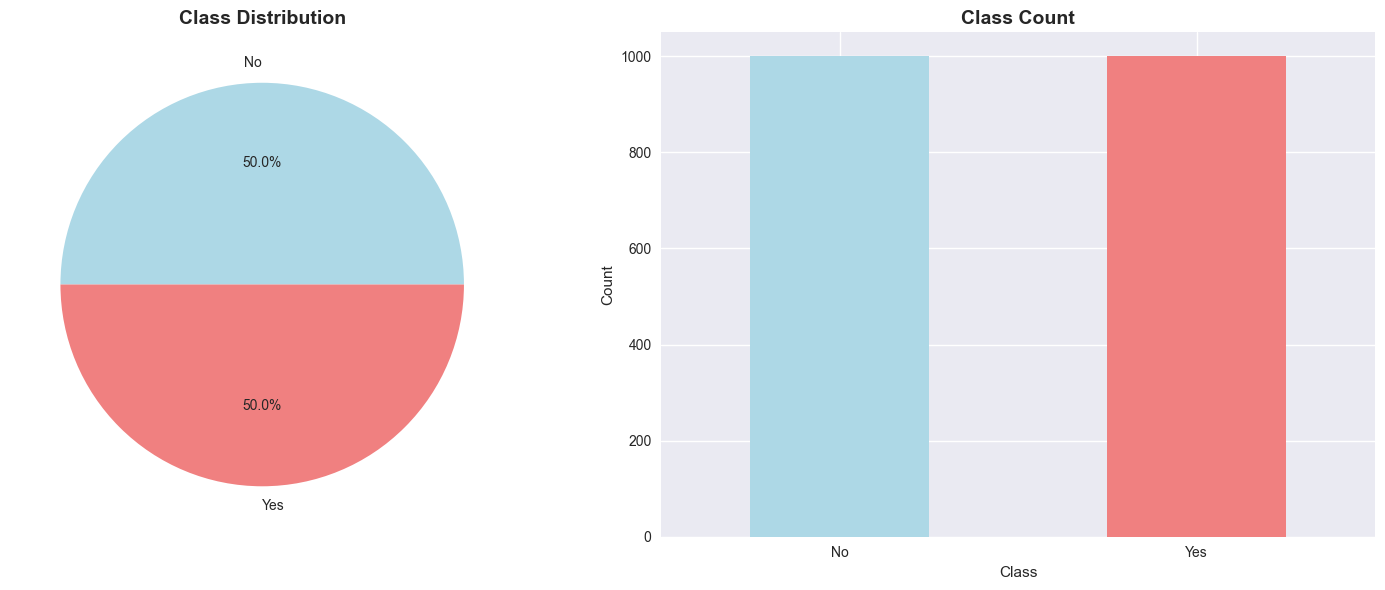

In [5]:
# Class distribution pie chart
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
df['has_parkinson'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', 
                                        colors=['lightblue', 'lightcoral'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Bar chart
df['has_parkinson'].value_counts().plot(kind='bar', ax=axes[1], 
                                        color=['lightblue', 'lightcoral'])
axes[1].set_title('Class Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [9]:
feature_names = [col for col in df.columns if col not in ['label', 'has_parkinson']]

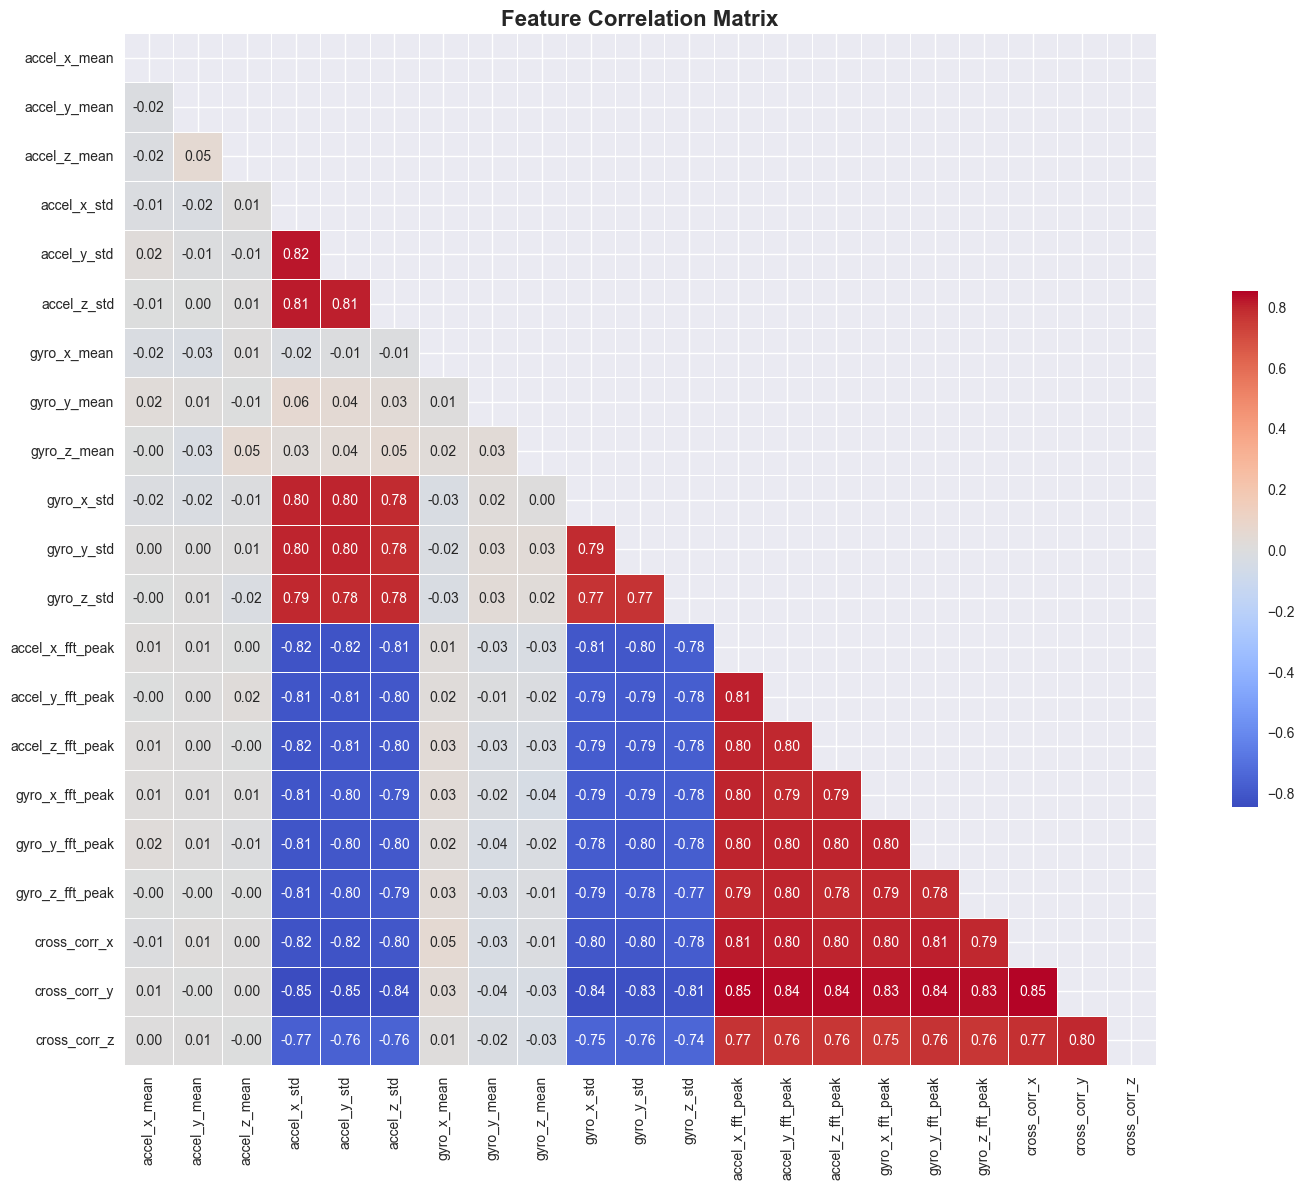

In [10]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df[feature_names].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

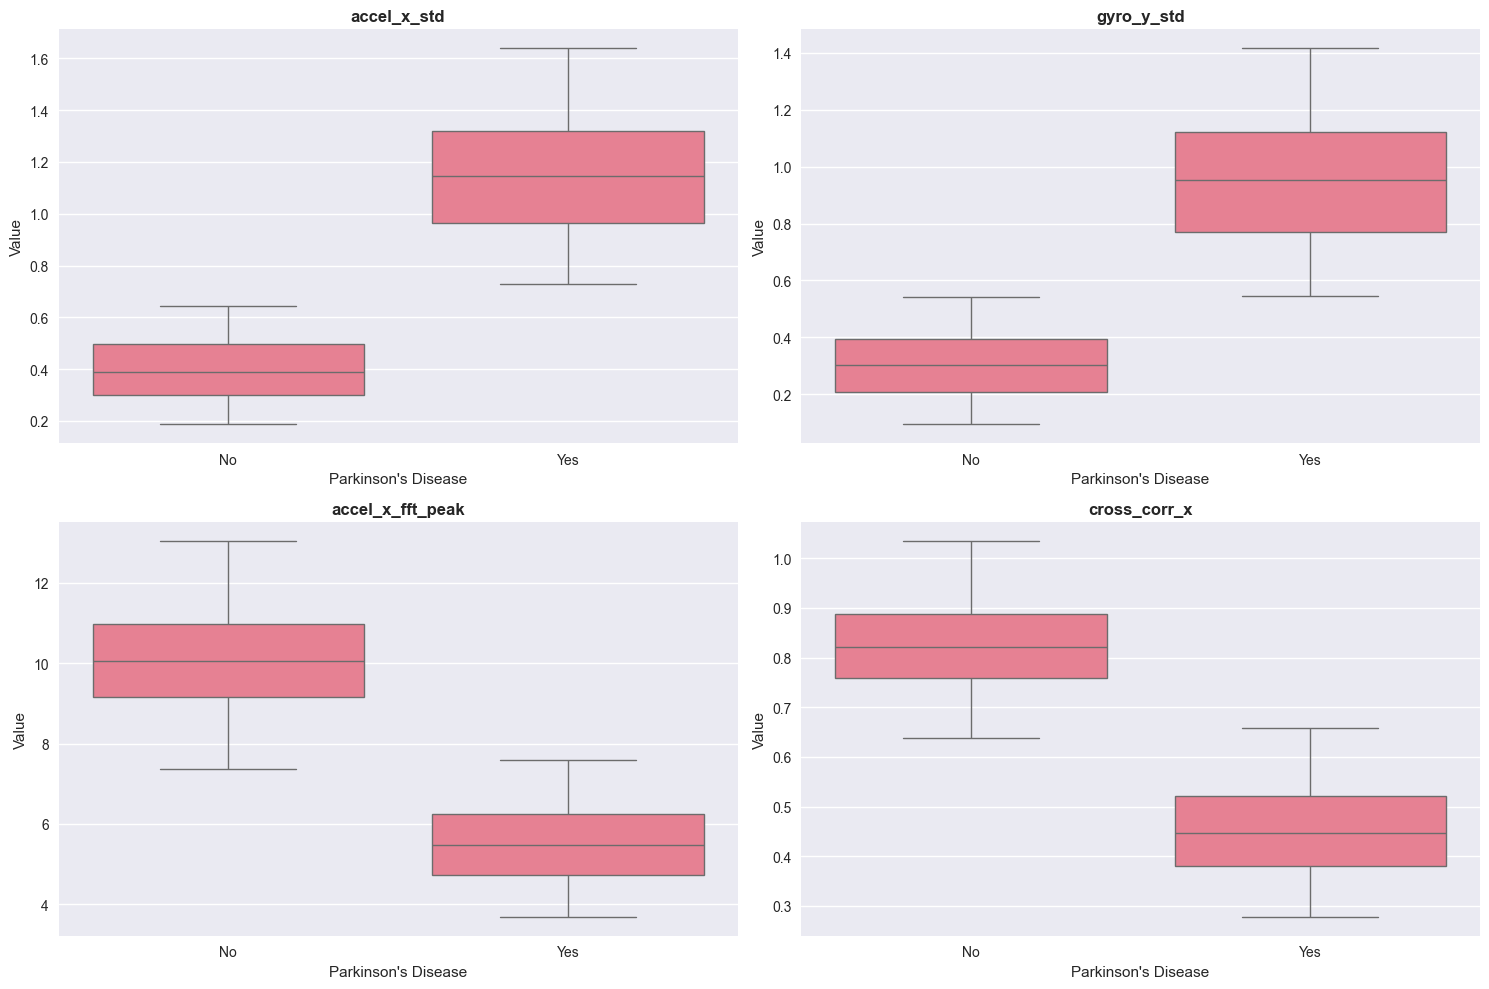

In [11]:
# Box plots for key features
key_features = ['accel_x_std', 'gyro_y_std', 'accel_x_fft_peak', 'cross_corr_x']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.boxplot(data=df, x='has_parkinson', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].set_xlabel('Parkinson\'s Disease')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing <a id="preprocessing"></a>

In [12]:
# Prepare features and labels
X = df[feature_names].values
y = df['label'].values

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Feature names: {feature_names}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Features shape: (2000, 21)
Labels shape: (2000,)
Feature names: ['accel_x_mean', 'accel_y_mean', 'accel_z_mean', 'accel_x_std', 'accel_y_std', 'accel_z_std', 'gyro_x_mean', 'gyro_y_mean', 'gyro_z_mean', 'gyro_x_std', 'gyro_y_std', 'gyro_z_std', 'accel_x_fft_peak', 'accel_y_fft_peak', 'accel_z_fft_peak', 'gyro_x_fft_peak', 'gyro_y_fft_peak', 'gyro_z_fft_peak', 'cross_corr_x', 'cross_corr_y', 'cross_corr_z']

Training set shape: (1280, 21)
Validation set shape: (320, 21)
Test set shape: (400, 21)


In [13]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Features standardized.")
print(f"Training set mean: {X_train_scaled.mean():.6f}")
print(f"Training set std: {X_train_scaled.std():.6f}")

Features standardized.
Training set mean: -0.000000
Training set std: 1.000000


In [14]:
# means for each input
means = scaler.mean_
# standard deviation for each input
scales = scaler.scale_

print("Means:", scaler.mean_) 
print("Scales:", scaler.scale_)

Means: [ 2.16451445e-03  4.34967010e-03  6.17531195e-04  7.76659989e-01
  8.90769845e-01  7.51154485e-01 -4.49073831e-05  4.78739464e-04
  1.99448259e-03  5.53282868e-01  6.29934365e-01  4.74331566e-01
  7.80763320e+00  7.77254842e+00  7.70679030e+00  7.73052468e+00
  7.77779237e+00  7.74355218e+00  6.38417917e-01  5.87826023e-01
  6.62068710e-01]
Scales: [0.09279512 0.12847095 0.09247015 0.41559714 0.49850243 0.45241221
 0.04470217 0.04561358 0.04507193 0.34681894 0.36963002 0.31590781
 2.55606792 2.48898691 2.48891113 2.50131653 2.51043773 2.47561772
 0.2045824  0.25516114 0.19698866]


## 4. Model Architecture <a id="model"></a>

In [15]:
def create_model(input_dim, learning_rate=0.001):
    """
    Create a neural network model for Parkinson's detection
    """
    model = keras.Sequential([
        # Input layer
        layers.Input(shape=(input_dim,)),
        
        # First hidden layer
        layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Second hidden layer
        layers.Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Third hidden layer
        layers.Dense(16, activation='relu', kernel_initializer='glorot_uniform'),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    return model

# Create the model
model = create_model(input_dim=X_train_scaled.shape[1])

# Display model architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,225 (16.50 KB)

 Non-trainable params: 192 (768.00 B)

## 5. Model Training <a id="training"></a>

In [16]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True, verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1
)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    'best_parkinsons_model.h5', monitor='val_loss', save_best_only=True, verbose=1
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

print('Training completed!')

Epoch 1/100
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7555 - loss: 0.5208 - precision: 0.7530 - recall: 0.7735
Epoch 1: val_loss improved from inf to 0.24578, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7724 - loss: 0.4960 - precision: 0.7685 - recall: 0.7907 - val_accuracy: 1.0000 - val_loss: 0.2458 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/100
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9944 - loss: 0.1165 - precision: 0.9938 - recall: 0.9952
Epoch 2: val_loss improved from 0.24578 to 0.05865, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9950 - loss: 0.1115 - precision: 0.9944 - recall: 0.9959 - val_accuracy: 1.0000 - val_loss: 0.0587 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/100
26/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9957 - loss: 0.0520 - precision: 0.9936 - recall: 0.9980
Epoch 3: val_loss improved from 0.05865 to 0.01678, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9963 - loss: 0.0482 - precision: 0.9946 - recall: 0.9981 - val_accuracy: 1.0000 - val_loss: 0.0168 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/100
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0224 - precision: 1.0000 - recall: 1.0000 
Epoch 4: val_loss improved from 0.01678 to 0.00613, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0222 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0061 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/100
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0160 - precision: 1.0000 - recall: 1.0000
Epoch 5: val_loss improved from 0.00613 to 0.00270, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0157 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0027 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/100
27/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0104 - precision: 1.0000 - recall: 1.0000
Epoch 6: val_loss improved from 0.00270 to 0.00136, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0102 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 0.0014 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/100
24/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0099 - precision: 1.0000 - recall: 1.0000
Epoch 7: val_loss improved from 0.00136 to 0.00077, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0092 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 7.6560e-04 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0062 - precision: 1.0000 - recall: 1.0000
Epoch 8: val_loss improved from 0.00077 to 0.00047, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0062 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.7209e-04 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/100
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0050 - precision: 1.0000 - recall: 1.0000
Epoch 9: val_loss improved from 0.00047 to 0.00030, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0050 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0207e-04 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 10/100
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0053 - precision: 1.0000 - recall: 1.0000 
Epoch 10: val_loss improved from 0.00030 to 0.00019, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0052 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.9108e-04 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 11/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0035 - precision: 1.0000 - recall: 1.0000 
Epoch 11: val_loss improved from 0.00019 to 0.00014, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0035 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.3595e-04 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 12/100
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0025 - precision: 1.0000 - recall: 1.0000
Epoch 12: val_loss improved from 0.00014 to 0.00011, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0025 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.0762e-04 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 13/100
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0024 - precision: 1.0000 - recall: 1.0000 
Epoch 13: val_loss improved from 0.00011 to 0.00008, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0025 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 8.1772e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 14/100
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0024 - precision: 1.0000 - recall: 1.0000  
Epoch 14: val_loss improved from 0.00008 to 0.00007, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0024 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 6.5271e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - precision: 1.0000 - recall: 1.0000   
Epoch 15: val_loss improved from 0.00007 to 0.00006, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0016 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 5.5239e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 16/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0018 - precision: 1.0000 - recall: 1.0000    
Epoch 16: val_loss improved from 0.00006 to 0.00005, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0018 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.5111e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 17/100
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0014 - precision: 1.0000 - recall: 1.0000     
Epoch 17: val_loss improved from 0.00005 to 0.00004, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0016 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.6358e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 18/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0014 - precision: 1.0000 - recall: 1.0000   
Epoch 18: val_loss improved from 0.00004 to 0.00003, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0014 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0899e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 19/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0014 - precision: 1.0000 - recall: 1.0000 
Epoch 19: val_loss improved from 0.00003 to 0.00003, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0014 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.6633e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 20/100
27/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.7192e-04 - precision: 1.0000 - recall: 1.0000
Epoch 20: val_loss improved from 0.00003 to 0.00002, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0010 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.2528e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 21/100
28/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0010 - precision: 1.0000 - recall: 1.0000    
Epoch 21: val_loss improved from 0.00002 to 0.00002, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0011 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.8682e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 22/100
27/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.4522e-04 - precision: 1.0000 - recall: 1.0000
Epoch 22: val_loss improved from 0.00002 to 0.00002, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 8.8560e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.5809e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 23/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.6076e-04 - precision: 1.0000 - recall: 1.0000
Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 23: val_loss improved from 0.00002 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 9.5553e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.3813e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 24/100
26/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0013 - precision: 1.0000 - recall: 1.0000    
Epoch 24: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0013 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.2726e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 25/100
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.2762e-04 - precision: 1.0000 - recall: 1.0000
Epoch 25: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 8.0671e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.1986e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 26/100
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.9679e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 26: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 8.3596e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.1200e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 27/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.6966e-04 - precision: 1.0000 - recall: 1.0000
Epoch 27: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 7.7318e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.0337e-05 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 28/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.6601e-04 - precision: 1.0000 - recall: 1.0000
Epoch 28: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 6.6332e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 9.7234e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 29/100
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.2691e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 29: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 8.1716e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 9.1552e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 30/100
28/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.8788e-04 - precision: 1.0000 - recall: 1.0000
Epoch 30: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 6.0368e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 8.6337e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 31/100
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0014 - precision: 1.0000 - recall: 1.0000  
Epoch 31: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0013 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 8.1004e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 32/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.5069e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 32: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 6.5207e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 7.5382e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 33/100
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.7077e-04 - precision: 1.0000 - recall: 1.0000
Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 33: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 6.7508e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 7.1114e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 34/100
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.7102e-04 - precision: 1.0000 - recall: 1.0000
Epoch 34: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 8.1592e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 6.8979e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 35/100
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0021 - precision: 1.0000 - recall: 1.0000
Epoch 35: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0019 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 6.6935e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 36/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.0857e-04 - precision: 1.0000 - recall: 1.0000
Epoch 36: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 4.1497e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 6.4140e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 37/100
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.5226e-04 - precision: 1.0000 - recall: 1.0000
Epoch 37: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 7.5638e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 6.0917e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 38/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 6.1529e-04 - precision: 1.0000 - recall: 1.0000
Epoch 38: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 6.1452e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 5.8101e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 39/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.5917e-04 - precision: 1.0000 - recall: 1.0000
Epoch 39: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 4.5765e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 5.6621e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 40/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 9.9075e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 40: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 9.5996e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 5.4396e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 41/100
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 7.2926e-04 - precision: 1.0000 - recall: 1.0000
Epoch 41: val_loss improved from 0.00001 to 0.00001, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 7.2172e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 5.2255e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 42/100
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.5513e-04 - precision: 1.0000 - recall: 1.0000
Epoch 42: val_loss improved from 0.00001 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 3.6735e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.9956e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 43/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 6.6704e-04 - precision: 1.0000 - recall: 1.0000
Epoch 43: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 43: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 6.6341e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.7674e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 44/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.5420e-04 - precision: 1.0000 - recall: 1.0000
Epoch 44: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 3.6662e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.6793e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 45/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.6490e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 45: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 4.7104e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.5038e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 46/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.9651e-04 - precision: 1.0000 - recall: 1.0000
Epoch 46: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 8.5779e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.3122e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 47/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.9706e-04 - precision: 1.0000 - recall: 1.0000
Epoch 47: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 3.9958e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.2344e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 48/100
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 4.7128e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 48: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 4.4729e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.2015e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 49/100
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.3044e-04 - precision: 1.0000 - recall: 1.0000
Epoch 49: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 8.0353e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.1797e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 50/100
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 4.5374e-04 - precision: 1.0000 - recall: 1.0000
Epoch 50: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 4.5004e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 4.1509e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 51/100
27/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0024 - precision: 1.0000 - recall: 1.0000    
Epoch 51: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0020 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.9560e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 52/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.6561e-04 - precision: 1.0000 - recall: 1.0000
Epoch 52: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 3.6590e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.8255e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 53/100
29/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.2814e-04 - precision: 1.0000 - recall: 1.0000
Epoch 53: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 53: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 5.1293e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.7908e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.2500e-04
Epoch 54/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.3294e-04 - precision: 1.0000 - recall: 1.0000
Epoch 54: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 4.3706e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.7309e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 55/100
28/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 8.5657e-04 - precision: 1.0000 - recall: 1.0000
Epoch 55: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 7.8135e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.6620e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 56/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 3.5717e-04 - precision: 1.0000 - recall: 1.0000
Epoch 56: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 3.6079e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.5774e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 57/100
26/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.4429e-04 - precision: 1.0000 - recall: 1.0000
Epoch 57: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 3.5296e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.5313e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 58/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.4258e-04 - precision: 1.0000 - recall: 1.0000
Epoch 58: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 3.4243e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.5557e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 59/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.9343e-04 - precision: 1.0000 - recall: 1.0000
Epoch 59: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 2.9976e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.5201e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 60/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 4.6810e-04 - precision: 1.0000 - recall: 1.0000
Epoch 60: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 4.7250e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.4792e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 61/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.7075e-04 - precision: 1.0000 - recall: 1.0000
Epoch 61: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 2.7103e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.4534e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 62/100
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 9.8531e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 62: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 9.4780e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.4059e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 63/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 7.2769e-04 - precision: 1.0000 - recall: 1.0000
Epoch 63: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 63: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 1.0000 - loss: 7.2232e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.3744e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 6.2500e-05
Epoch 64/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.3789e-04 - precision: 1.0000 - recall: 1.0000
Epoch 64: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 3.5604e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.3561e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 65/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.0708e-04 - precision: 1.0000 - recall: 1.0000
Epoch 65: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 3.1593e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.2878e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 66/100
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 5.5067e-04 - precision: 1.0000 - recall: 1.0000
Epoch 66: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 5.4412e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.2849e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 67/100
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.8941e-04 - precision: 1.0000 - recall: 1.0000
Epoch 67: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 2.8785e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.3604e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 68/100
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 4.1978e-04 - precision: 1.0000 - recall: 1.0000
Epoch 68: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 4.1110e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.3422e-06 - val_precision: 1.00

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 4.1294e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.2489e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 70/100
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 5.0659e-04 - precision: 1.0000 - recall: 1.0000
Epoch 70: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 5.0964e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1916e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 71/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 2.4246e-04 - precision: 1.0000 - recall: 1.0000
Epoch 71: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 2.4355e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1789e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 72/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.3648e-04 - precision: 1.0000 - recall: 1.0000
Epoch 72: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 5.1516e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1755e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 73/100
36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.0633e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 73: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 73: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 3.0138e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1266e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.1250e-05
Epoch 74/100
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.0226e-04 - precision: 1.0000 - recall: 1.0000
Epoch 74: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.0294e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1587e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 75/100
26/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.4409e-04 - precision: 1.0000 - recall: 1.0000
Epoch 75: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 5.4301e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1443e-06 - val_precision: 1.0000

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 6.5419e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1135e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 77/100
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.8490e-04 - precision: 1.0000 - recall: 1.0000
Epoch 77: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 5.7887e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1550e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 78/100
26/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.1638e-04 - precision: 1.0000 - recall: 1.0000
Epoch 78: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 4.6583e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0852e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 79/100
28/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.3214e-04 - precision: 1.0000 - recall: 1.0000  
Epoch 79: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 5.5632e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0644e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 80/100
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 7.5049e-04 - precision: 1.0000 - recall: 1.0000
Epoch 80: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 7.0810e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.1015e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 81/100
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 5.0712e-04 - precision: 1.0000 - recall: 1.0000
Epoch 81: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 4.8713e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0208e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 82/100
33/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.4876e-04 - precision: 1.0000 - recall: 1.0000
Epoch 82: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 3.3217e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0085e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 83/100
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.6323e-04 - precision: 1.0000 - recall: 1.0000
Epoch 83: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 83: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 4.6426e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9747e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 1.5625e-05
Epoch 84/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.5292e-04 - precision: 1.0000 - recall: 1.0000
Epoch 84: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 4.5057e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9981e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 7.8125e-06
Epoch 85/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.5162e-04 - precision: 1.0000 - recall: 1.0000
Epoch 85: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.5119e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9827e-06 - val_precision: 1.0000

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 7.1929e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9706e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 7.8125e-06
Epoch 87/100
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.5036e-04 - precision: 1.0000 - recall: 1.0000
Epoch 87: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 3.4821e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9589e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 7.8125e-06
Epoch 88/100
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9995 - loss: 0.0011 - precision: 0.9991 - recall: 1.0000    
Epoch 88: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9994 - loss: 0.0012 - precision: 0.9989 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9851e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 7.8125e-06
Epoch 89/100
27/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.7002e-04 - precision: 1.0000 - recall: 1.0000
Epoch 89: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.1518e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0230e-06 - val_precision: 1.0000 - v

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 3.6680e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9467e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 7.8125e-06
Epoch 92/100
32/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.6199e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 92: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 4.0086e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 3.0221e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 7.8125e-06
Epoch 93/100
35/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.2307e-04 - precision: 1.0000 - recall: 1.0000
Epoch 93: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 93: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 2.2738e-04 - precision: 1.0000 - recal

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 2.4916e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9423e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.9063e-06
Epoch 97/100
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.3731e-04 - precision: 1.0000 - recall: 1.0000
Epoch 97: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 3.4116e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9303e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.9063e-06
Epoch 98/100
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.6492e-04 - precision: 1.0000 - recall: 1.0000
Epoch 98: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 4.6293e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9015e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.9063e-06
Epoch 99/100
31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.9815e-04 - precision: 1.0000 - recall: 1.0000
Epoch 99: val_loss improved from 0.00000 to 0.00000, saving model to best_parkinsons_model.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 8.4910e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.8953e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.9063e-06
Epoch 100/100
30/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 4.1475e-04 - precision: 1.0000 - recall: 1.0000 
Epoch 100: val_loss did not improve from 0.00000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 4.1585e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 2.9728e-06 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 3.9063e-06
Restoring model weights from the end of the best epoch: 99.
Training completed!


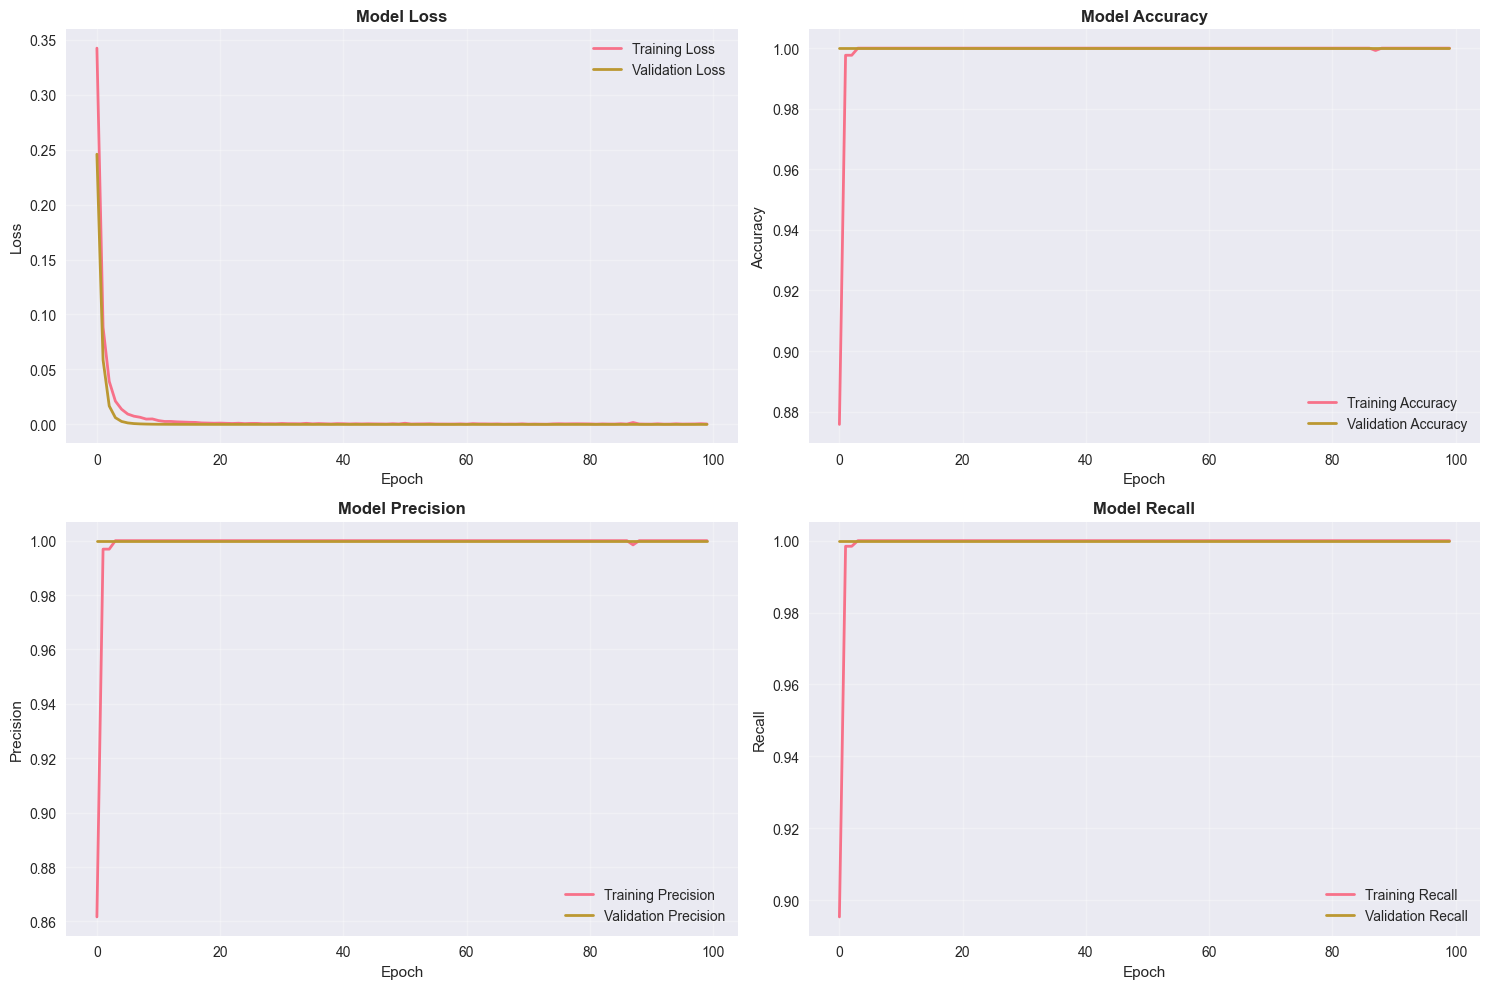

In [17]:
# Plot training history
def plot_training_history(history):
    """
    Plot training and validation metrics
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 0].set_title('Model Loss', fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0, 1].set_title('Model Accuracy', fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Precision
    axes[1, 0].plot(history.history['precision'], label='Training Precision', linewidth=2)
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision', linewidth=2)
    axes[1, 0].set_title('Model Precision', fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Recall
    axes[1, 1].plot(history.history['recall'], label='Training Recall', linewidth=2)
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall', linewidth=2)
    axes[1, 1].set_title('Model Recall', fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

## 6. Model Evaluation <a id="evaluation"></a>

In [27]:
# Load the best model
best_model = keras.models.load_model('best_parkinsons_model.h5')

# Make predictions
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("Test Set Evaluation:")
print("=" * 50)

# Calculate metrics
test_loss, test_accuracy, test_precision, test_recall = best_model.evaluate(
    X_test_scaled, y_test, verbose=0
)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {2 * (test_precision * test_recall) / (test_precision + test_recall):.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Test Set Evaluation:
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1-Score: 1.0000


In [19]:
# Detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Parkinson\'s']))


Detailed Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       200
 Parkinson's       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



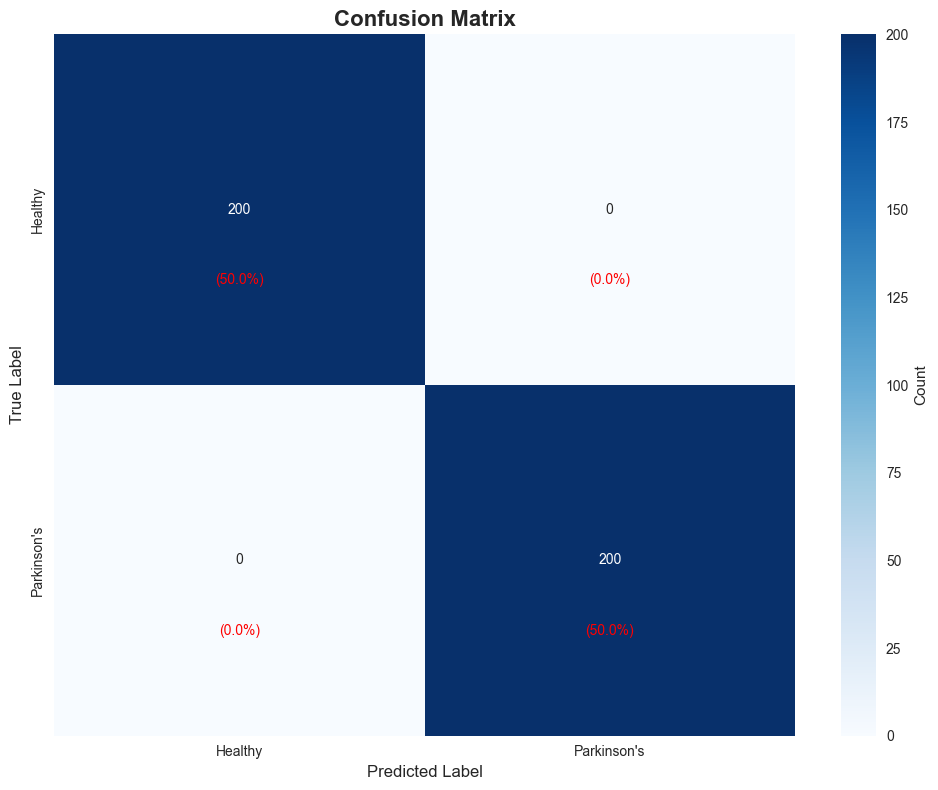


Confusion Matrix Statistics:
True Negatives (Healthy correctly classified): 200
False Positives (Healthy misclassified as Parkinson's): 0
False Negatives (Parkinson's misclassified as Healthy): 0
True Positives (Parkinson's correctly classified): 200

Sensitivity (True Positive Rate): 1.0000
Specificity (True Negative Rate): 1.0000


In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Parkinson\'s'],
            yticklabels=['Healthy', 'Parkinson\'s'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Add percentage annotations
total = np.sum(cm)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.7, f'({cm[i, j]/total*100:.1f}%)', 
                ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print confusion matrix statistics
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Statistics:")
print(f"True Negatives (Healthy correctly classified): {tn}")
print(f"False Positives (Healthy misclassified as Parkinson's): {fp}")
print(f"False Negatives (Parkinson's misclassified as Healthy): {fn}")
print(f"True Positives (Parkinson's correctly classified): {tp}")
print(f"\nSensitivity (True Positive Rate): {tp/(tp+fn):.4f}")
print(f"Specificity (True Negative Rate): {tn/(tn+fp):.4f}")

## 7. Results and Insights <a id="results"></a>


                    MODEL PERFORMANCE SUMMARY
     Metric  Value
   Accuracy    1.0
  Precision    1.0
     Recall    1.0
   F1-Score    1.0
    AUC-ROC    1.0
Specificity    1.0
Sensitivity    1.0


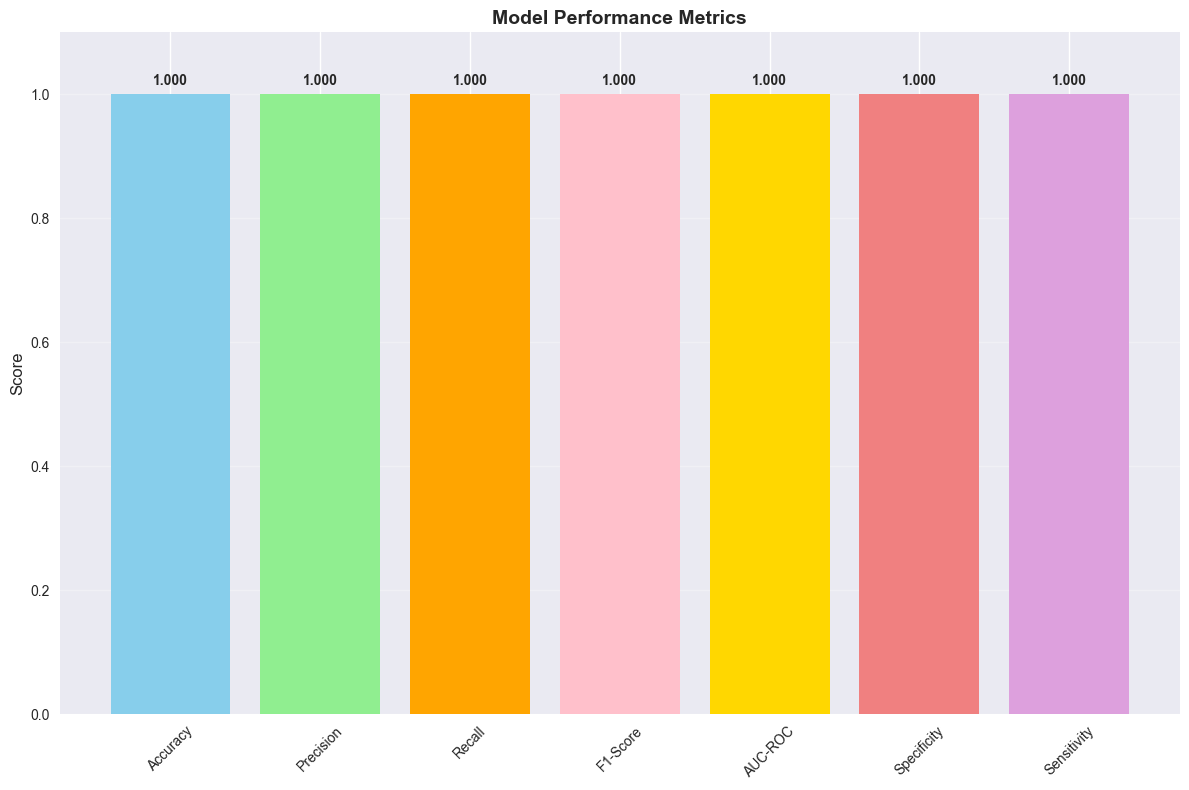

In [25]:
# Model performance summary
performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Specificity', 'Sensitivity'],
    'Value': [
        test_accuracy,
        test_precision, 
        test_recall,
        2 * (test_precision * test_recall) / (test_precision + test_recall),
        roc_auc_score(y_test, y_pred_proba),
        tn/(tn+fp),  # Specificity
        tp/(tp+fn)   # Sensitivity
    ]
}

performance_df = pd.DataFrame(performance_metrics)
performance_df['Value'] = performance_df['Value'].round(4)

print("\n" + "="*60)
print("                    MODEL PERFORMANCE SUMMARY")
print("="*60)
print(performance_df.to_string(index=False))
print("="*60)

# Visualize performance metrics
plt.figure(figsize=(12, 8))
bars = plt.bar(performance_df['Metric'], performance_df['Value'], 
               color=['skyblue', 'lightgreen', 'orange', 'pink', 'gold', 'lightcoral', 'plum'])
plt.ylim(0, 1.1)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Metrics', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, performance_df['Value']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [26]:
# Save the model and preprocessing components
import joblib
import tensorflow as tf

# Save the scaler
joblib.dump(scaler, 'parkinsons_scaler.pkl')

# Save feature names
with open('feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(feature + '\n')

# Load the best model
model = tf.keras.models.load_model('best_parkinsons_model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the .tflite model
with open('parkinsons_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model artifacts saved:")
print("- Model: parkinsons_model.tflite")
print("- Scaler: parkinsons_scaler.pkl")
print("- Feature names: feature_names.txt")


INFO:tensorflow:Assets written to: C:\Users\Youssef\AppData\Local\Temp\tmp5ie81m3b\assets


INFO:tensorflow:Assets written to: C:\Users\Youssef\AppData\Local\Temp\tmp5ie81m3b\assets


Saved artifact at 'C:\Users\Youssef\AppData\Local\Temp\tmp5ie81m3b'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 21), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2370370314192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284069968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284072656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284076304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284076496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284072464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284072848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284071888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284074576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2370284070736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  23702840743